In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("co2.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
x = df.drop('CO2 Emissions(g/km)', axis = 1)
y = df['CO2 Emissions(g/km)'] 

## Exploratory Data Analysis

In [5]:
x.shape

(7385, 11)

In [6]:
for col in x.columns: 
    print(col)
    print(x[col].isnull().sum())

Make
0
Model
0
Vehicle Class
0
Engine Size(L)
0
Cylinders
0
Transmission
0
Fuel Type
0
Fuel Consumption City (L/100 km)
0
Fuel Consumption Hwy (L/100 km)
0
Fuel Consumption Comb (L/100 km)
0
Fuel Consumption Comb (mpg)
0


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 634.8+ KB


### Data Understanding

In [7]:
numeric_col = []
object_col = []

for col in x.columns:
    if x[col].dtype in [np.int64, np.float64]:
        numeric_col.append(col)
    else:
        object_col.append(col)

In [8]:
numeric_col

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)']

In [9]:
object_col

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [10]:
x_numeric = x[numeric_col]
x_object = x[object_col]

In [11]:
x_numeric.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [12]:
x_object.head()

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


### Univariate Analysis

##### Numeric Columns

In [13]:
x_numeric.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000


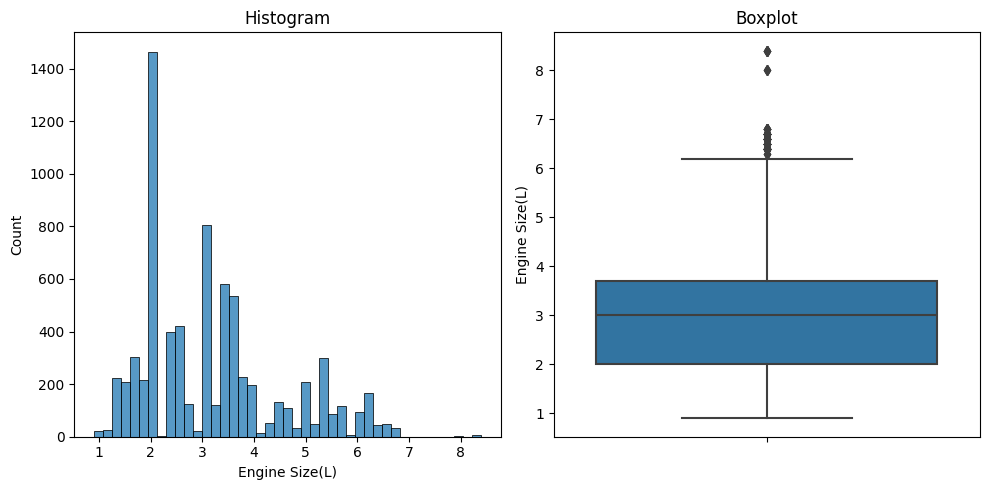

Columns : Engine Size(L)
Skewness: 0.8091809893113103
Kurtosis: -0.1319632848497747
p - value : 8.917891732394904e-139
Data is NOT normally distributed


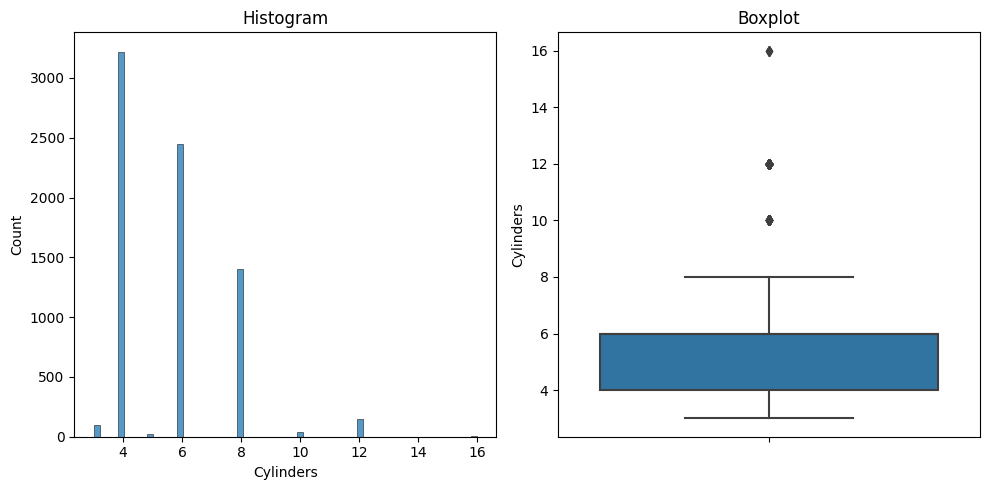

Columns : Cylinders
Skewness: 1.1104154181552897
Kurtosis: 1.5251749532359167
p - value : 5.473904930612653e-277
Data is NOT normally distributed


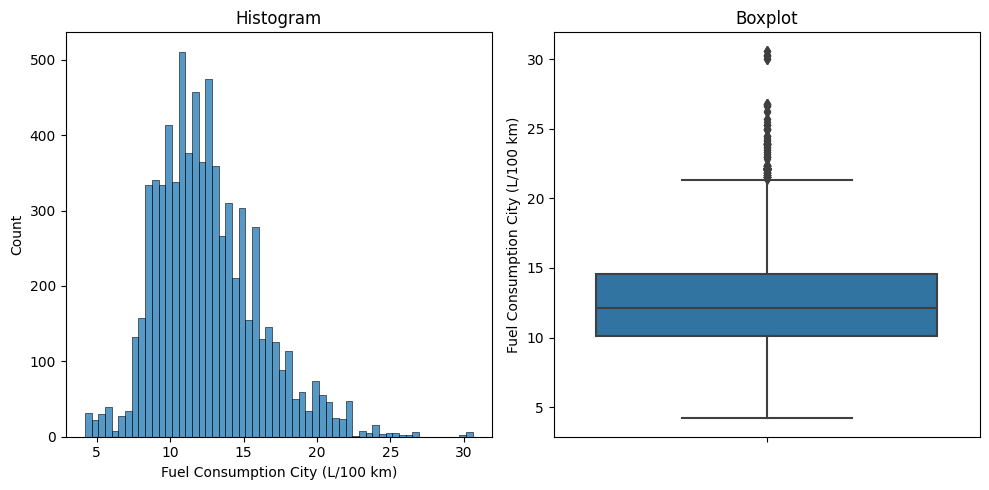

Columns : Fuel Consumption City (L/100 km)
Skewness: 0.809004712577022
Kurtosis: 1.1961449732393845
p - value : 2.704812414352894e-177
Data is NOT normally distributed


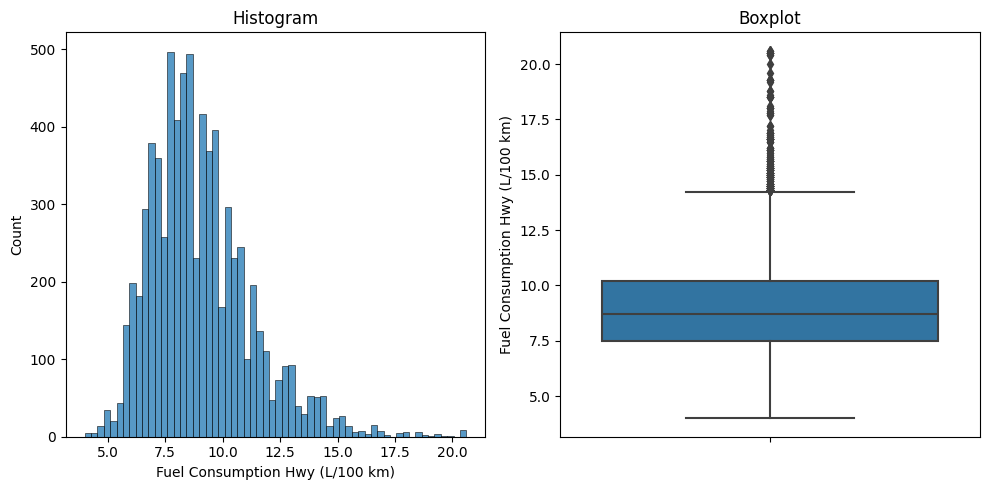

Columns : Fuel Consumption Hwy (L/100 km)
Skewness: 1.0792166921679716
Kurtosis: 2.0089688957038776
p - value : 1.0098037275001452e-288
Data is NOT normally distributed


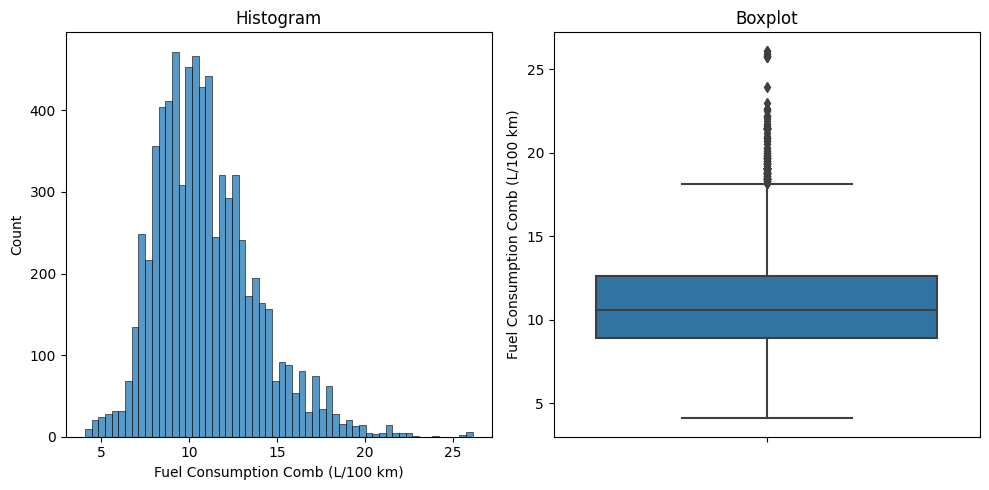

Columns : Fuel Consumption Comb (L/100 km)
Skewness: 0.893315721747063
Kurtosis: 1.393575350888704
p - value : 2.8272572165256524e-209
Data is NOT normally distributed


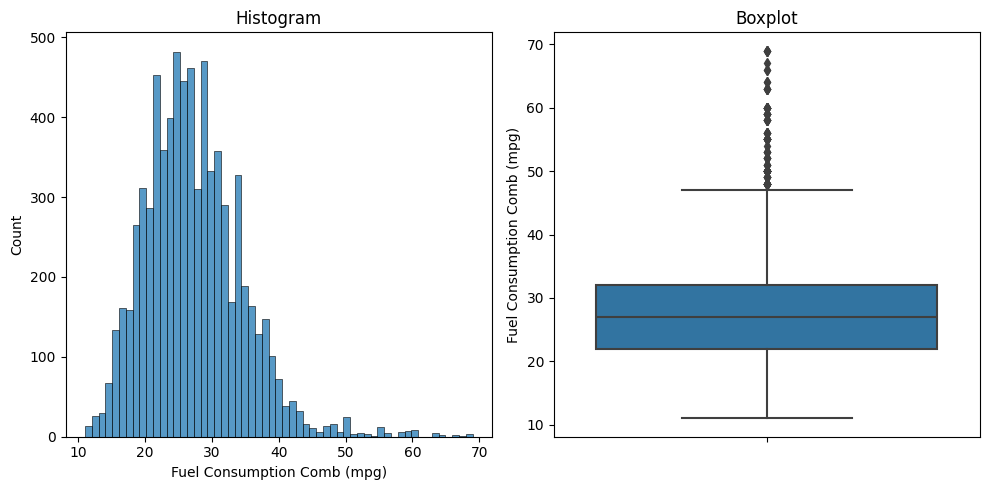

Columns : Fuel Consumption Comb (mpg)
Skewness: 0.9770340609789473
Kurtosis: 2.4993690355238343
p - value : 2.7633320043103937e-279
Data is NOT normally distributed


In [14]:
from scipy.stats import normaltest #Pakai normaltest buat large dataset sample > 5000

for col in x_numeric.columns:
    plt.figure(figsize = (10,5))
    
    #Histogram
    plt.subplot(1, 2, 1) #1 Row, 2 Columns, First Plot
    sns.histplot(x_numeric[col])
    plt.title('Histogram')
    
    
    #Boxplot
    plt.subplot(1, 2, 2) #1 Row, 2 Columns, Second plot
    sns.boxplot(y = x_numeric[col])
    plt.title('Boxplot')
    
    plt.tight_layout()
    plt.show()
    

    print(f'Columns : {col}')
    print(f'Skewness: {x_numeric[col].skew()}')
    print(f'Kurtosis: {x_numeric[col].kurtosis()}')
    
    stat, p = normaltest(x_numeric[col])
    print(f'p - value : {p}')
    if np.isnan(p): 
        continue
    elif p > 0.05: 
        print("Data is normally distributed")
    else:
        print("Data is NOT normally distributed")

In [ ]:
results = []

for col in x_numeric.columns:

    skewness = x_numeric[col].skew()
    kurtosis = x_numeric[col].kurtosis()
    stat, p = normaltest(x_numeric[col])
    
    if np.isnan(p):
        normality = "Unknown"
    elif p > 0.05:
        normality = "Normal"
    else:
        normality = "Not Normal"
    
    results.append({
        'Feature': col,
        'Normality': normality,
        'P-Value': p,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })

results_df = pd.DataFrame(results)

results_df

,Feature,Normality,P-Value,Skewness,Kurtosis
0,Engine Size(L),Not Normal,8.917892e-139,0.809181,-0.131963
1,Cylinders,Not Normal,5.473905e-277,1.110415,1.525175
2,Fuel Consumption City (L/100 km),Not Normal,2.704812e-177,0.809005,1.196145
3,Fuel Consumption Hwy (L/100 km),Not Normal,1.009804e-288,1.079217,2.008969
4,Fuel Consumption Comb (L/100 km),Not Normal,2.827257e-209,0.893316,1.393575
5,Fuel Consumption Comb (mpg),Not Normal,2.763332e-279,0.977034,2.499369


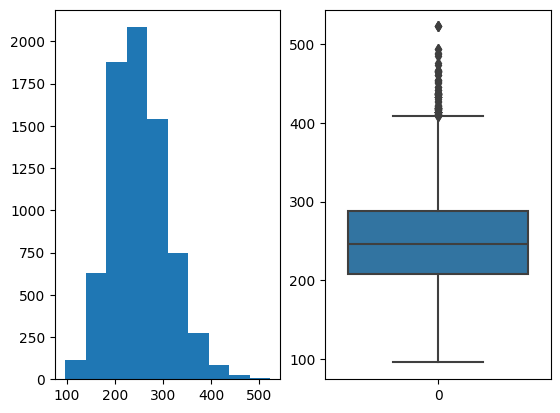

In [16]:
# Distribusi target variable
plt.subplot(1, 2, 1)
plt.hist(y)

plt.subplot(1, 2, 2)
sns.boxplot(y)
plt.show()

In [17]:
outlier = []

# Pakai IQR karena semua kolom tidak terdistribusi normal dan sangkat skewed dan keliatannya jumlah outliernya 
# sangat banyak sehingga IQR sangat bagus untuk deteksi outlier karena IQR menggunakan Q1 dan Q3 yang tidak terlalu
# bergantung pada mean dan standar deviasi 

for col in x_numeric.columns:
    
    q1 = x_numeric[col].quantile(0.25)
    q3 = x_numeric[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    
    outliers = x_numeric[(x_numeric[col] < lower_outlier) | (x_numeric[col] > upper_outlier)][col]

    outlier.append({
        'Column': col,
        'Outliers': len(outliers),
        'percentage_outlier' : round((len(outliers) / len(x[col])), 4) * 100
    })
    
outlier = pd.DataFrame(outlier)
outlier = outlier.sort_values(by='Outliers', ascending = False).reset_index(drop = True)

outlier

,Column,Outliers,percentage_outlier
0,Fuel Consumption Hwy (L/100 km),208,2.82
1,Cylinders,196,2.65
2,Fuel Consumption Comb (L/100 km),142,1.92
3,Engine Size(L),137,1.86
4,Fuel Consumption City (L/100 km),132,1.79
5,Fuel Consumption Comb (mpg),114,1.54


In [18]:
from scipy.stats.mstats import winsorize

for col in x_numeric.columns: 
    x_numeric[col] = winsorize(x_numeric[col], limits = [0.05, 0.05])

In [19]:
outlier = []

# Pakai IQR karena semua kolom tidak terdistribusi normal dan sangkat skewed dan keliatannya jumlah outliernya 
# sangat banyak sehingga IQR sangat bagus untuk deteksi outlier karena IQR menggunakan Q1 dan Q3 yang tidak terlalu
# bergantung pada mean dan standar deviasi 

for col in x_numeric.columns:
    
    q1 = x_numeric[col].quantile(0.25)
    q3 = x_numeric[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    
    outliers = x_numeric[(x_numeric[col] < lower_outlier) | (x_numeric[col] > upper_outlier)][col]

    outlier.append({
        'Column': col,
        'Outliers': len(outliers),
        'percentage_outlier' : round((len(outliers) / len(x[col])), 4) * 100
    })
    
outlier = pd.DataFrame(outlier)
outlier = outlier.sort_values(by='Outliers', ascending = False).reset_index(drop = True)

outlier

,Column,Outliers,percentage_outlier
0,Engine Size(L),0,0.0
1,Cylinders,0,0.0
2,Fuel Consumption City (L/100 km),0,0.0
3,Fuel Consumption Hwy (L/100 km),0,0.0
4,Fuel Consumption Comb (L/100 km),0,0.0
5,Fuel Consumption Comb (mpg),0,0.0


##### Object Columns

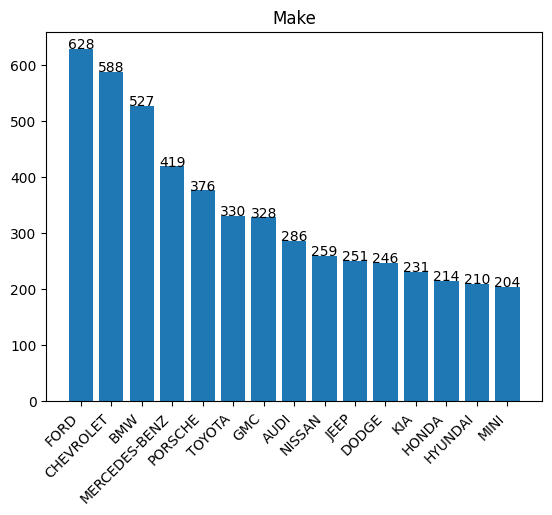

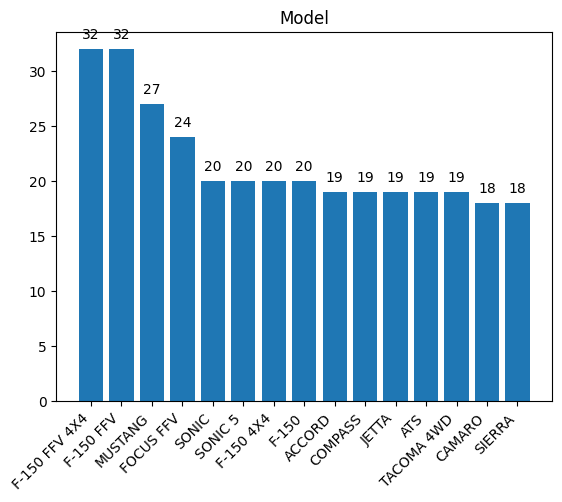

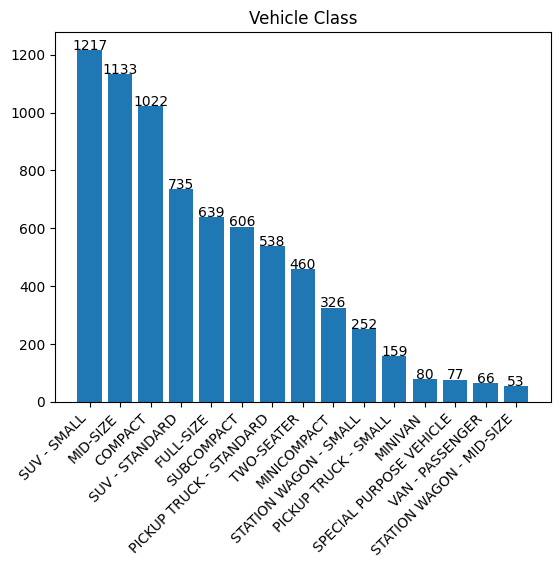

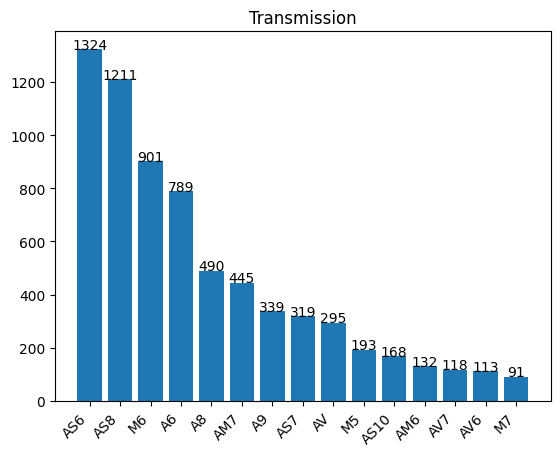

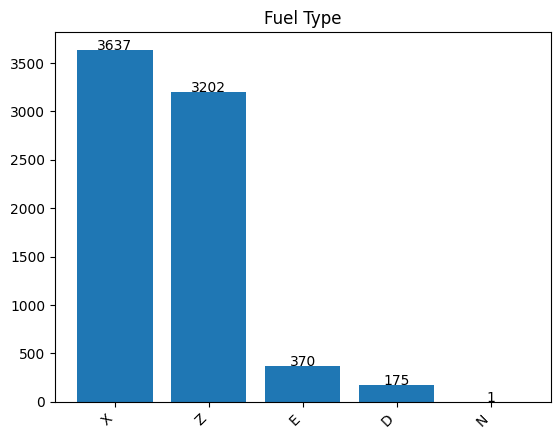

In [20]:
for col in x_object.columns:
    category_counts = x_object[col].value_counts()
    
    if len(category_counts) > 15:
        top_15 = category_counts.head(15)
        plt.bar(top_15.index, top_15.values)
        
        for i, value in enumerate(top_15.values):
            plt.text(i, value + 1, str(value), ha ='center', fontsize = 10)
    else:
        plt.bar(category_counts.index, category_counts.values)
        
        for i, value in enumerate(category_counts.values):
            plt.text(i, value + 1, str(value), ha ='center', fontsize = 10)
    
    plt.title(f'{col}')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

### Bivariate Analysis

In [21]:
from scipy.stats import spearmanr

corr = []

for col in x_numeric.columns:

    corr_coeff, p_value = spearmanr(x_numeric[col], y)
    
    if p_value < 0.05:
        print(f"There is a statistically significant correlation between {col} and predicted_cc")
        relation = 'Correlate'
    else:
        relation = 'Not'
    

    corr.append({
        'Feature': col,
        'Correlation Score': corr_coeff,
        'p-value': p_value,
        'Relation': relation
    })

df_corr = pd.DataFrame(corr)

df_corr

There is a statistically significant correlation between Engine Size(L) and predicted_cc
There is a statistically significant correlation between Cylinders and predicted_cc
There is a statistically significant correlation between Fuel Consumption City (L/100 km) and predicted_cc
There is a statistically significant correlation between Fuel Consumption Hwy (L/100 km) and predicted_cc
There is a statistically significant correlation between Fuel Consumption Comb (L/100 km) and predicted_cc
There is a statistically significant correlation between Fuel Consumption Comb (mpg) and predicted_cc


,Feature,Correlation Score,p-value,Relation
0,Engine Size(L),0.869269,0.0,Correlate
1,Cylinders,0.847764,0.0,Correlate
2,Fuel Consumption City (L/100 km),0.955825,0.0,Correlate
3,Fuel Consumption Hwy (L/100 km),0.940721,0.0,Correlate
4,Fuel Consumption Comb (L/100 km),0.962481,0.0,Correlate
5,Fuel Consumption Comb (mpg),-0.961673,0.0,Correlate


### Multivariate Analysis

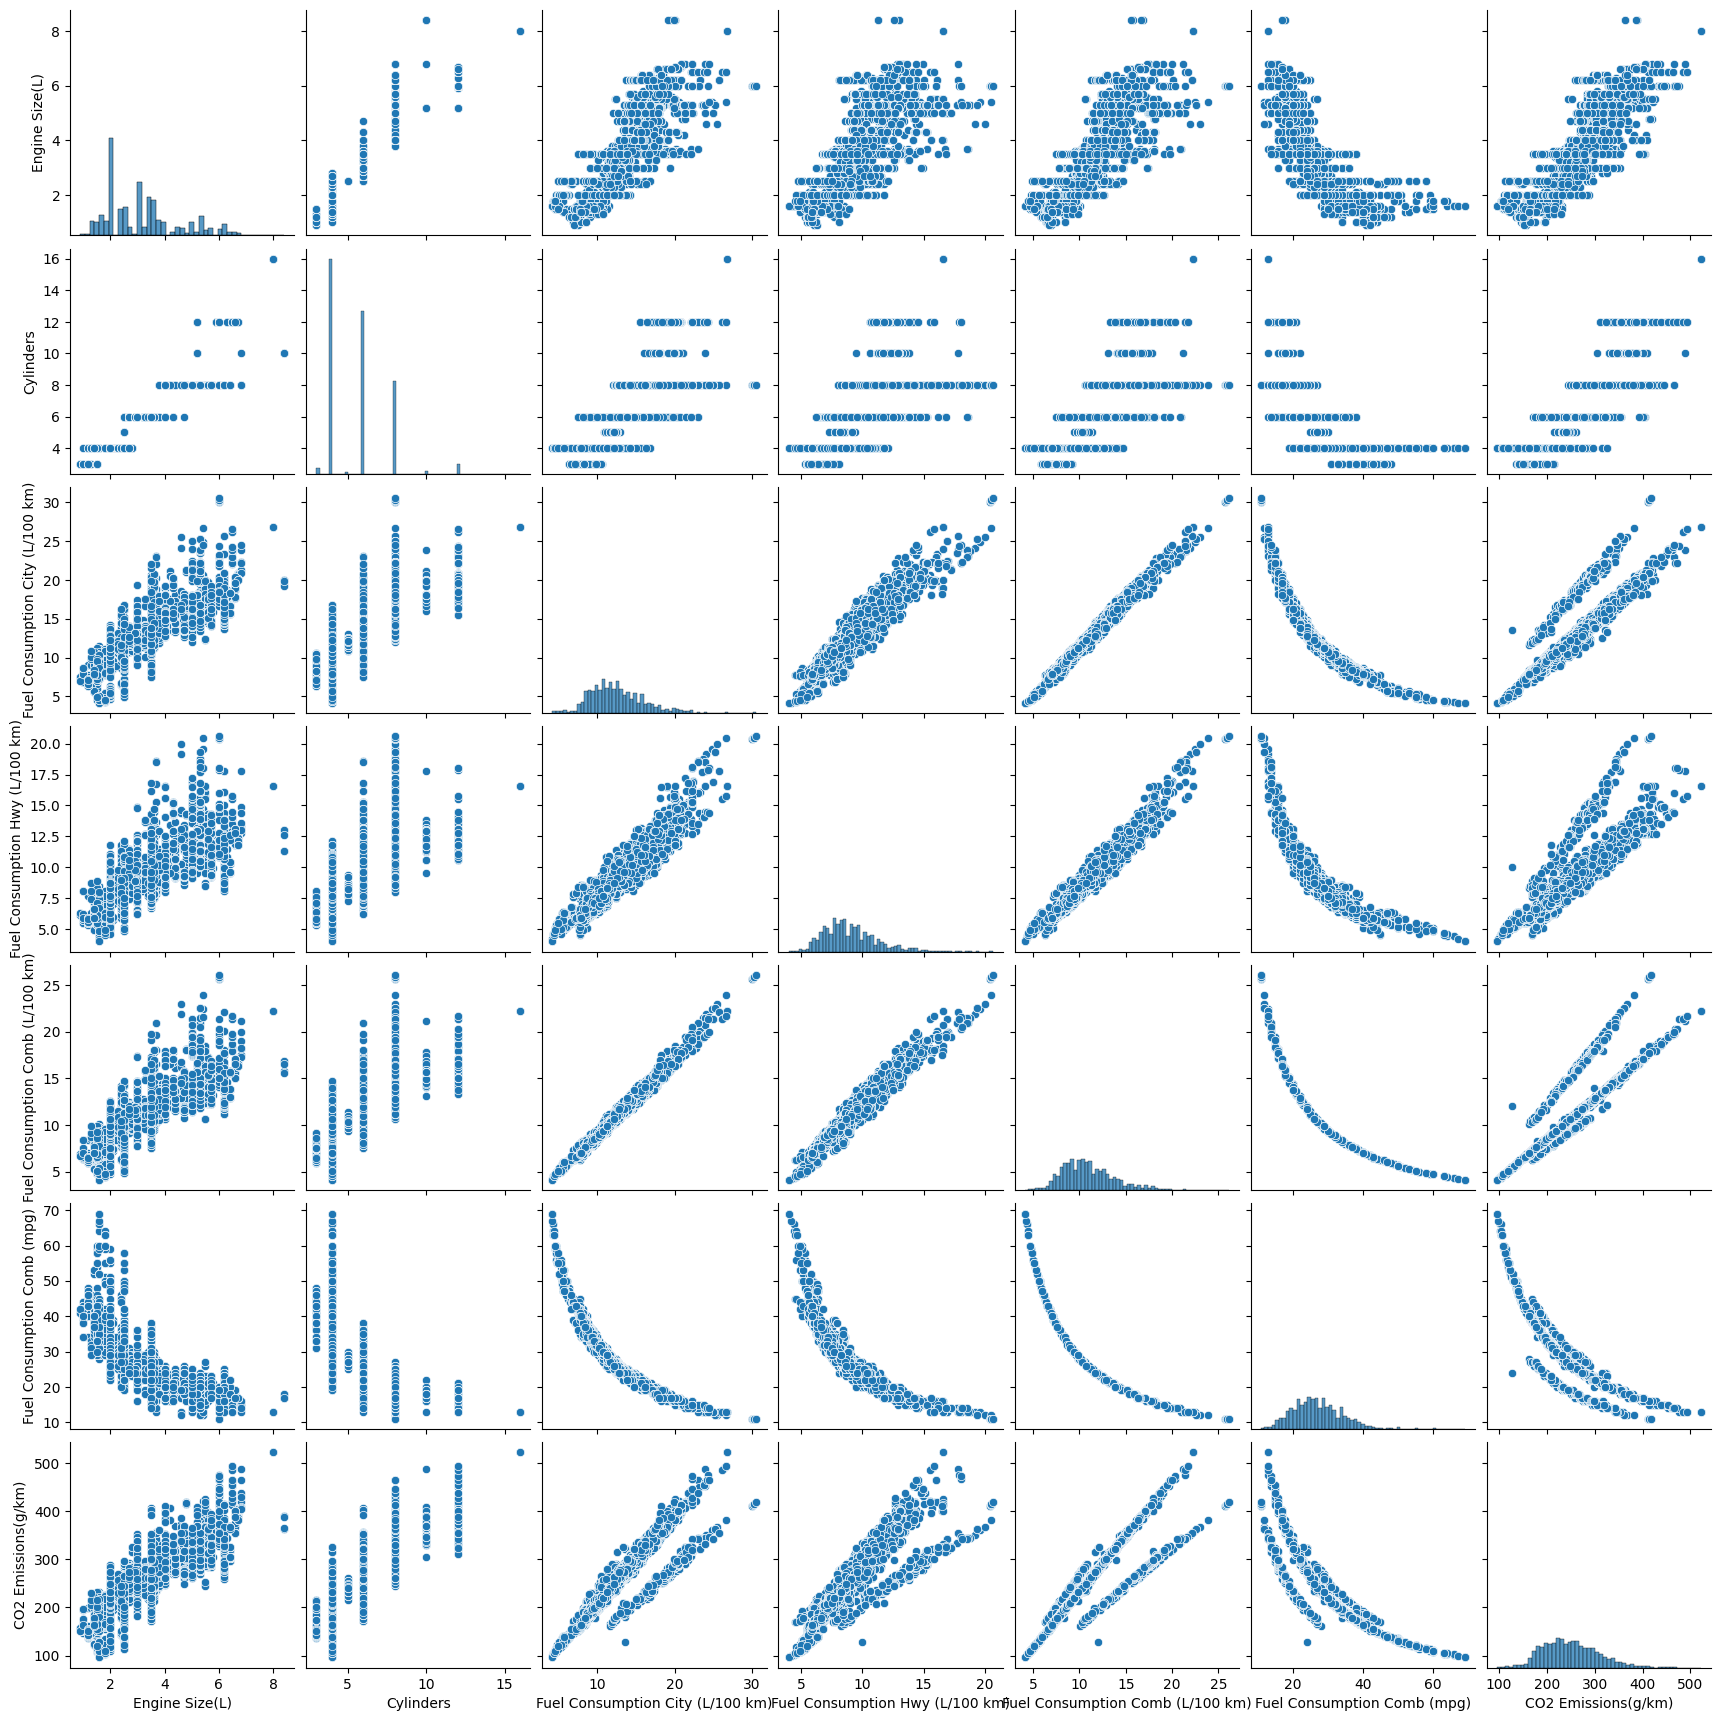

In [22]:
sns.pairplot(df, palette = 'husl')

<Axes: >

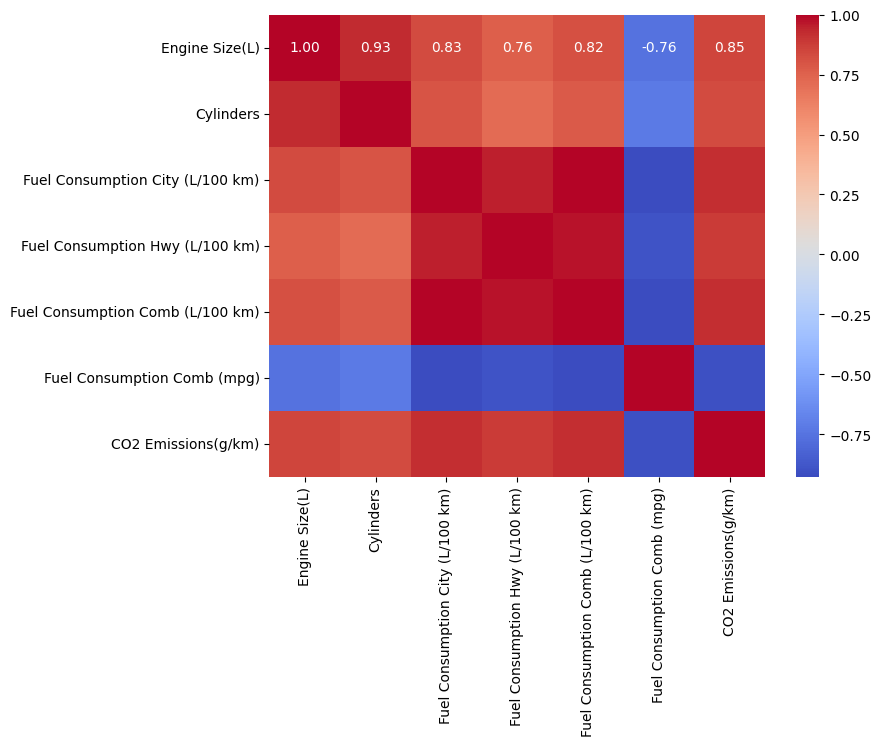

In [24]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

Dari hasil pairplot dan heatmap, antar variabel independennya mengindikasikan ada multikolinearitas dimana antar setiap variabel independennya memiliki nilai korelasi yang cukup tinggi. 

## Feature Engineering

### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in x_object.columns:
    x_object[col] = enc.fit_transform(x_object[col])

x_object.head()

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,0,1057,0,14,4
1,0,1057,0,25,4
2,0,1058,0,22,4
3,0,1233,11,15,4
4,0,1499,11,15,4


### Merging

In [26]:
data = pd.merge(x_numeric, x_object, how = 'outer', left_index = True, right_index = True)
data.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
Make                                0
Model                               0
Vehicle Class                       0
Transmission                        0
Fuel Type                           0
dtype: int64

In [27]:
data.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make,Model,Vehicle Class,Transmission,Fuel Type
0,2.0,4,9.9,6.7,8.5,33,0,1057,0,14,4
1,2.4,4,11.2,7.7,9.6,29,0,1057,0,25,4
2,1.5,4,8.0,6.1,7.2,39,0,1058,0,22,4
3,3.5,6,12.7,9.1,11.1,25,0,1233,11,15,4
4,3.5,6,12.1,8.7,10.6,27,0,1499,11,15,4


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Fuel Consumption City (L/100 km)  7385 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 5   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 6   Make                              7385 non-null   int64  
 7   Model                             7385 non-null   int64  
 8   Vehicle Class                     7385 non-null   int64  
 9   Transmission                      7385 non-null   int64  
 10  Fuel Type                         7385 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 634.8 KB


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vif_data)

                             Feature           VIF
0                     Engine Size(L)     72.131984
1                          Cylinders    128.303715
2   Fuel Consumption City (L/100 km)  13148.538444
3    Fuel Consumption Hwy (L/100 km)   4476.926057
4   Fuel Consumption Comb (L/100 km)  31599.136770
5        Fuel Consumption Comb (mpg)     16.747626
6                               Make      4.546927
7                              Model      4.494292
8                      Vehicle Class      3.392300
9                       Transmission      5.977213
10                         Fuel Type     15.692589


Ada hubungan linear yang sangat kuat antar variabel konsumsi bahan bakar dan ukuran mesin.

- Fuel Consumption (City, Hwy, Comb) jelas berkorelasi tinggi satu sama lain karena semuanya mengukur hal yang hampir sama (konsumsi bahan bakar).
- Engine Size dan Cylinders juga sangat terkait — makin besar mesin, biasanya silindernya makin banyak.
- Fuel Consumption Comb (mpg) adalah konversi langsung dari Fuel Consumption Comb (L/100 km), jadi pasti super kolinear (karena secara matematis berbanding terbalik).

### Normalization

In [29]:
from sklearn.preprocessing import RobustScaler

scale = RobustScaler()

data_norm = pd.DataFrame(scale.fit_transform(data), columns = data.columns)

data_norm.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make,Model,Vehicle Class,Transmission,Fuel Type
0,-0.588235,-1.0,-0.488889,-0.740741,-0.567568,0.6,-0.9,0.058409,-0.666667,-0.090909,1.0
1,-0.352941,-1.0,-0.200000,-0.370370,-0.270270,0.2,-0.9,0.058409,-0.666667,0.909091,1.0
2,-0.882353,-1.0,-0.911111,-0.962963,-0.918919,1.2,-0.9,0.059416,-0.666667,0.636364,1.0
3,0.294118,0.0,0.133333,0.148148,0.135135,-0.2,-0.9,0.235650,0.555556,0.000000,1.0
4,0.294118,0.0,0.000000,0.000000,0.000000,0.0,-0.9,0.503525,0.555556,0.000000,1.0


### Splitting Data

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_norm, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5908, 11)
(1477, 11)
(5908,)
(1477,)


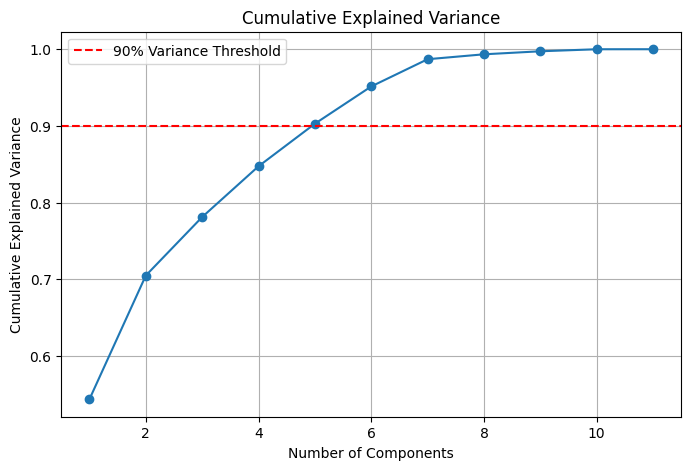

Number of components for 90% explained variance: 5


In [31]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)

# Explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance Threshold")
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

# Find the number of components for 90% variance
n_components = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f"Number of components for 90% explained variance: {n_components}")


In [36]:
variance_5 = 0

for i, var in enumerate(pca.explained_variance_ratio_[:5], 1):
    print(f"Komponen {i}: {var*100:.2f}% variansi")
    variance_5 += var

print(f"5 komponen pertama menjelaskan {variance_5*100:.2f}% dari total variansi data.")

Komponen 1: 54.36% variansi
Komponen 2: 16.13% variansi
Komponen 3: 7.63% variansi
Komponen 4: 6.62% variansi
Komponen 5: 5.55% variansi
5 komponen pertama menjelaskan 90.29% dari total variansi data.


In [39]:
pca_final = PCA(n_components=5)
x_train_pca = pca_final.fit_transform(x_train)
x_test_pca = pca_final.transform(x_test)

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Ensemble Learning
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score

### Modelling 1

In [45]:
dt = DecisionTreeRegressor()
ln = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor(objective = 'reg:squarederror', random_state = 0)

dt.fit(x_train_pca, y_train)
ln.fit(x_train_pca, y_train)
rf.fit(x_train_pca, y_train)
xg.fit(x_train_pca, y_train)

y_pred_dt = dt.predict(x_test_pca)
y_pred_ln = ln.predict(x_test_pca)
y_pred_rf = rf.predict(x_test_pca)
y_pred_xg = xg.predict(x_test_pca)

metrics = {
    "Model": ["Decision Tree", "Linear Regression", "Random Forest", "XGBRegressor"],
    "R2_Score": [
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_ln),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xg),
    ],
    "MAE": [
        MAE(y_test, y_pred_dt),
        MAE(y_test, y_pred_ln),
        MAE(y_test, y_pred_rf),
        MAE(y_test, y_pred_xg),
    ],
    "MSE": [
        MSE(y_test, y_pred_dt),
        MSE(y_test, y_pred_ln),
        MSE(y_test, y_pred_rf),
        MSE(y_test, y_pred_xg),
    ],
}

results_df = pd.DataFrame(metrics)

results_df

,Model,R2_Score,MAE,MSE
0,Decision Tree,0.981557,3.669680,63.180359
1,Linear Regression,0.888146,12.720349,383.169897
2,Random Forest,0.990140,3.395211,33.777358
3,XGBRegressor,0.989186,3.609177,37.045151


In [47]:
data_reduced = data_norm[['Make', 'Model', 'Vehicle Class', 'Transmission']]
vif_data = pd.DataFrame()
vif_data["Feature"] = data_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(data_reduced.values, i) for i in range(data_reduced.shape[1])]
print(vif_data)

         Feature       VIF
0           Make  1.026910
1          Model  1.039355
2  Vehicle Class  1.067381
3   Transmission  1.054763


In [48]:
x_train, x_test, y_train, y_test = train_test_split(data_reduced, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5908, 4)
(1477, 4)
(5908,)
(1477,)


In [49]:
dt = DecisionTreeRegressor()
ln = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor(objective = 'reg:squarederror', random_state = 0)

dt.fit(x_train, y_train)
ln.fit(x_train, y_train)
rf.fit(x_train, y_train)
xg.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
y_pred_ln = ln.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_xg = xg.predict(x_test)

metrics = {
    "Model": ["Decision Tree", "Linear Regression", "Random Forest", "XGBRegressor"],
    "R2_Score": [
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_ln),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xg),
    ],
    "MAE": [
        MAE(y_test, y_pred_dt),
        MAE(y_test, y_pred_ln),
        MAE(y_test, y_pred_rf),
        MAE(y_test, y_pred_xg),
    ],
    "MSE": [
        MSE(y_test, y_pred_dt),
        MSE(y_test, y_pred_ln),
        MSE(y_test, y_pred_rf),
        MSE(y_test, y_pred_xg),
    ],
}

results_df = pd.DataFrame(metrics)

results_df

,Model,R2_Score,MAE,MSE
0,Decision Tree,0.894314,10.573938,362.041933
1,Linear Regression,0.175404,41.593284,2824.755256
2,Random Forest,0.909095,11.425697,311.404962
3,XGBRegressor,0.871299,14.610038,440.879822


Dilihat dari hasil dataframe, bahwa PCA untuk semua model dan semua metriks lebih bagus daripada pembuangan feature, hal ini dikarenakan feature yang digunakan sisa 4 sehingga terlalu membuang banyak informasi sedangkan PCA tidak membuang informasi tersebut melainkan merangkumnya